In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense



# Data Preprocessing

In [2]:
df = pd.read_csv("amazon.csv")
df

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1,I bought this Sandisk 16GB Class 10 to use wit...,23-07-2013,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5,Used this for extending the capabilities of my...,22-08-2013,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5,Great card that is very fast and reliable. It ...,31-03-2014,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5,Good amount of space for the stuff I want to d...,16-09-2013,448,0,0,0,0,0.0,0.0


In [3]:
df.describe()

,Unnamed: 0,overall,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
count,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000
mean,2457.000000,4.587589,437.367040,1.311089,0.210376,1.521465,1.100712,0.075468,0.020053
std,1418.982617,0.996845,209.439871,41.619161,4.023296,44.123095,39.367949,0.256062,0.077187
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-130.000000,0.000000,0.000000
25%,1228.500000,5.000000,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2457.000000,5.000000,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3685.500000,5.000000,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4914.000000,5.000000,1064.000000,1952.000000,183.000000,2020.000000,1884.000000,1.000000,0.957544


In [4]:
df.isnull()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,False,False,False,False,False,False,False,False,False,False,False,False
4911,False,False,False,False,False,False,False,False,False,False,False,False
4912,False,False,False,False,False,False,False,False,False,False,False,False
4913,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.shape

(4915, 12)

In [6]:
df = df[['reviewText', 'overall']]

## df

In [8]:
df['reviewText'].fillna('', inplace=True)

C:\Users\ARUN\AppData\Local\Temp\ipykernel_17152\2383057894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviewText'].fillna('', inplace=True)


In [9]:
df

,reviewText,overall
0,No issues.,4
1,"Purchased this for my device, it worked as adv...",5
2,it works as expected. I should have sprung for...,4
3,This think has worked out great.Had a diff. br...,5
4,"Bought it with Retail Packaging, arrived legit...",5
...,...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...,1
4911,Used this for extending the capabilities of my...,5
4912,Great card that is very fast and reliable. It ...,5
4913,Good amount of space for the stuff I want to d...,5


In [10]:
df['sentiment'] = np.where(df['overall'] > 3, 'positive', 'negative')
df

C:\Users\ARUN\AppData\Local\Temp\ipykernel_17152\3449953016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = np.where(df['overall'] > 3, 'positive', 'negative')


,reviewText,overall,sentiment
0,No issues.,4,positive
1,"Purchased this for my device, it worked as adv...",5,positive
2,it works as expected. I should have sprung for...,4,positive
3,This think has worked out great.Had a diff. br...,5,positive
4,"Bought it with Retail Packaging, arrived legit...",5,positive
...,...,...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...,1,negative
4911,Used this for extending the capabilities of my...,5,positive
4912,Great card that is very fast and reliable. It ...,5,positive
4913,Good amount of space for the stuff I want to d...,5,positive


In [11]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")      #oov-token represents out-of vocalulary words
tokenizer.fit_on_texts(df['reviewText'])


In [12]:
sequences = tokenizer.texts_to_sequences(df['reviewText'])
sequences

[[30, 97],
 [134,
  10,
  11,
  8,
  136,
  5,
  98,
  22,
  307,
  27,
  42,
  129,
  17,
  181,
  109,
  19,
  28,
  169,
  3,
  523,
  7,
  157,
  13,
  345,
  10,
  20,
  7,
  30,
  1130,
  11,
  65],
 [5,
  21,
  22,
  257,
  3,
  208,
  17,
  4508,
  11,
  2,
  642,
  161,
  3,
  227,
  123,
  356,
  7,
  364,
  4509,
  78,
  2,
  1498,
  970,
  2,
  2483,
  749,
  24,
  22,
  2484,
  22,
  232],
 [10,
  227,
  62,
  98,
  80,
  23,
  33,
  7,
  4510,
  4511,
  128,
  9,
  4,
  51,
  348,
  2858,
  110,
  83,
  155,
  10,
  34,
  62,
  1430,
  70,
  263,
  56,
  169,
  3,
  33,
  8,
  145,
  75,
  16,
  8,
  3433,
  266,
  83,
  2068,
  4512,
  33,
  10,
  11,
  7,
  191,
  155,
  4,
  17,
  33,
  713,
  4513,
  169,
  5,
  20,
  507,
  48,
  8,
  145,
  6,
  8,
  3433,
  4,
  116,
  7,
  1770,
  10,
  9,
  14,
  201,
  4,
  609,
  2069],
 [44,
  5,
  15,
  714,
  252,
  342,
  1771,
  12,
  7,
  4514,
  1170,
  3434,
  302,
  24,
  3435,
  85,
  2,
  575,
  524,
  342,
  279,
  

In [13]:
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')
padded_sequences

array([[  30,   97,    0, ...,    0,    0,    0],
       [ 134,   10,   11, ...,    0,    0,    0],
       [   5,   21,   22, ...,    0,    0,    0],
       ...,
       [  23,    9,   18, ...,    0,    0,    0],
       [  41,  418,   13, ...,    0,    0,    0],
       [ 103, 1175,  254, ...,    0,    0,    0]])

In [14]:
labels = df['sentiment'].map({'positive': 1, 'negative': 0})
labels

0       1
1       1
2       1
3       1
4       1
       ..
4910    0
4911    1
4912    1
4913    1
4914    1
Name: sentiment, Length: 4915, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)


In [16]:
X_train

array([[  10,   14,   71, ...,   13, 2598,   12],
       [   3,   32,   10, ...,    0,    0,    0],
       [   3,  134,   10, ...,   80,   13,    2],
       ...,
       [  44,  188,   34, ...,    0,    0,    0],
       [  10,  119,    9, ...,    0,    0,    0],
       [1355,  134,  188, ...,    0,    0,    0]])

In [17]:
X_test

array([[  66,    3, 1890, ...,    0,    0,    0],
       [   3,  134,   10, ...,  831,   18,   64],
       [  44, 1517,    1, ...,    0,    0,    0],
       ...,
       [ 196,  138,  383, ...,    0,    0,    0],
       [  22, 1098,  228, ...,    0,    0,    0],
       [  77,   10,   11, ...,    0,    0,    0]])

In [18]:
y_train

3435    1
410     1
1047    1
2594    1
3260    1
       ..
4426    1
466     1
3092    1
3772    1
860     1
Name: sentiment, Length: 3932, dtype: int64

In [19]:
y_test

2346    1
4344    0
691     0
3910    1
2487    1
       ..
378     0
495     1
2432    1
184     1
205     1
Name: sentiment, Length: 983, dtype: int64

# Data Analysis

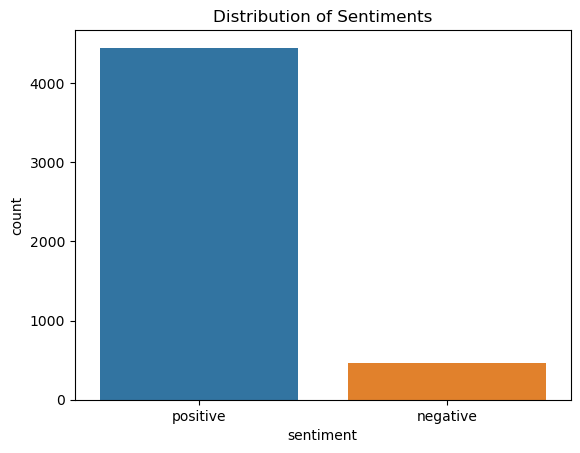

In [20]:
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()


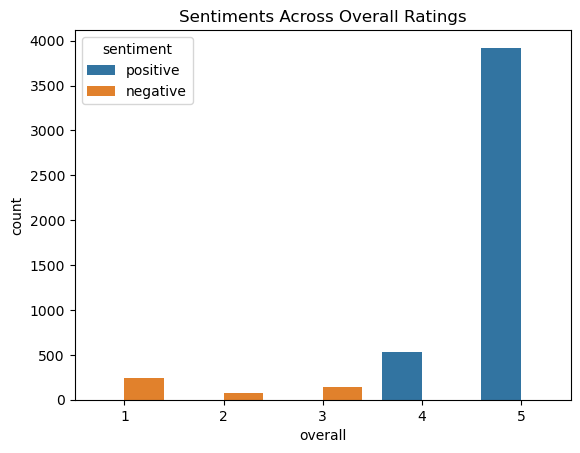

In [21]:
sns.countplot(x='overall', hue='sentiment', data=df)
plt.title('Sentiments Across Overall Ratings')
plt.show()


C:\Users\ARUN\AppData\Local\Temp\ipykernel_17152\501177517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_length'] = df['reviewText'].apply(len)


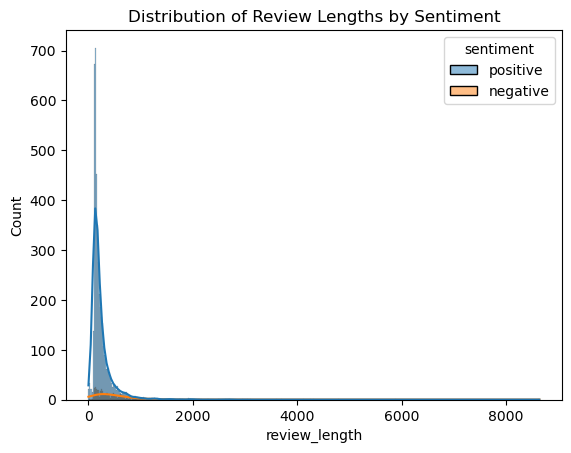

In [22]:
df['review_length'] = df['reviewText'].apply(len)
sns.histplot(df, x='review_length', hue='sentiment', kde=True)
plt.title('Distribution of Review Lengths by Sentiment')
plt.show()


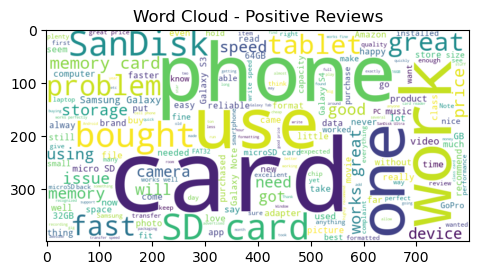

In [23]:
from wordcloud import WordCloud

positive_reviews = df[df['sentiment'] == 'positive']['reviewText'].str.cat(sep=' ')

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud - Positive Reviews')

plt.show()


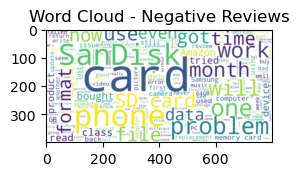

In [24]:
negative_reviews = df[df['sentiment'] == 'negative']['reviewText'].str.cat(sep=' ')

wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud - Negative Reviews')

plt.show()

In [25]:
positive_example = df[df['sentiment'] == 'positive']['reviewText'].iloc[0]
negative_example = df[df['sentiment'] == 'negative']['reviewText'].iloc[0]

print("Example of a Positive Review:")
print(positive_example)

print("\nExample of a Negative Review:")
print(negative_example)


Example of a Positive Review:
No issues.

Example of a Negative Review:
It works, but file writes are a bit slower than expected on a USB3 reader.Also, both reads and writes are FASTER with the card inside the standard-size SD adapter (15 MB/s vs 10 write; 45 MB/s vs 22 MB/s read) on the same card reader.  Can't figure why...


# Data Splitting

In [26]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)


In [27]:
X_train

array([[  10,   14,   71, ...,   13, 2598,   12],
       [   3,   32,   10, ...,    0,    0,    0],
       [   3,  134,   10, ...,   80,   13,    2],
       ...,
       [  44,  188,   34, ...,    0,    0,    0],
       [  10,  119,    9, ...,    0,    0,    0],
       [1355,  134,  188, ...,    0,    0,    0]])

In [28]:
X_test

array([[  66,    3, 1890, ...,    0,    0,    0],
       [   3,  134,   10, ...,  831,   18,   64],
       [  44, 1517,    1, ...,    0,    0,    0],
       ...,
       [ 196,  138,  383, ...,    0,    0,    0],
       [  22, 1098,  228, ...,    0,    0,    0],
       [  77,   10,   11, ...,    0,    0,    0]])

In [29]:
y_train

3435    1
410     1
1047    1
2594    1
3260    1
       ..
4426    1
466     1
3092    1
3772    1
860     1
Name: sentiment, Length: 3932, dtype: int64

In [30]:
y_test

2346    1
4344    0
691     0
3910    1
2487    1
       ..
378     0
495     1
2432    1
184     1
205     1
Name: sentiment, Length: 983, dtype: int64

# Model Building

In [31]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D


# Define the model
model = Sequential()

# Add an Embedding layer
model.add(Embedding(input_dim=5000, output_dim=16, input_length=100))
model.add(SpatialDropout1D(0.2))  # Dropout for regularization

# Add an LSTM layer
model.add(LSTM(100))

# Add a Dense output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           80000     
                                                                 
 spatial_dropout1d (Spatial  (None, 100, 16)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               46800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 126901 (495.71 KB)
Trainable params: 126901 (495.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')


Epoch 1/5


123/123 [==============================] - 12s 72ms/step - loss: 0.3254 - accuracy: 0.8983 - val_loss: 0.2721 - val_accuracy: 0.9023
Epoch 2/5
123/123 [==============================] - 11s 87ms/step - loss: 0.2772 - accuracy: 0.9112 - val_loss: 0.3028 - val_accuracy: 0.9074
Epoch 3/5
123/123 [==============================] - 13s 106ms/step - loss: 0.2756 - accuracy: 0.9054 - val_loss: 0.2908 - val_accuracy: 0.9034
Epoch 4/5
123/123 [==============================] - 12s 100ms/step - loss: 0.2846 - accuracy: 0.9056 - val_loss: 0.2845 - val_accuracy: 0.9034
Epoch 5/5
31/31 [==============================] - 1s 38ms/step - loss: 0.2687 - accuracy: 0.9074
Test Accuracy: 90.74%


# Model Validation

In [33]:
# Evaluate the model on the testing set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Predictions on the testing set
predictions = model.predict(X_test)

# Convert predictions to binary values (0 or 1)
binary_predictions = (predictions > 0.5).astype(int)

# Display classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_test, binary_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, binary_predictions))


31/31 [==============================] - 1s 38ms/step - loss: 0.2687 - accuracy: 0.9074
Test Loss: 0.2687
Test Accuracy: 90.74%
31/31 [==============================] - 2s 37ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.11      0.18        95
           1       0.91      0.99      0.95       888

    accuracy                           0.91       983
   macro avg       0.77      0.55      0.57       983
weighted avg       0.88      0.91      0.88       983


Confusion Matrix:
[[ 10  85]
 [  6 882]]


# Summary